<DIV ALIGN=CENTER>

# Introduction to Deep Learning
## Professor Robert J. Brunner
  
</DIV>  
-----
-----

## Introduction

In this Notebook, we introduce Deep Learning by analyzing a familiar
data set, the handwritten digit data we have classified earlier in this
course by using a variety of methods. Deep Learning is a vast and
growing subject, thus in one lesson (and corresponding notebook) we will
not be able to cover the full range of topics or techniques. Instead, in
this Notebook, we focus on actually building and applying deep learning
models to a data set. We will use the [Keras][kdl] deep learning framework in
this Notebook since it is simple to apply and follows a scikit learn
interface (build model, fit, and predict). 

To get started, we will first read in the digit data, before splitting
the data into a training and testing data sets. Finally, we will flatten
the data to simplify the application of a simple deep learning model.

-----
[kdl]: http://keras.io

Total number of samples = 1797


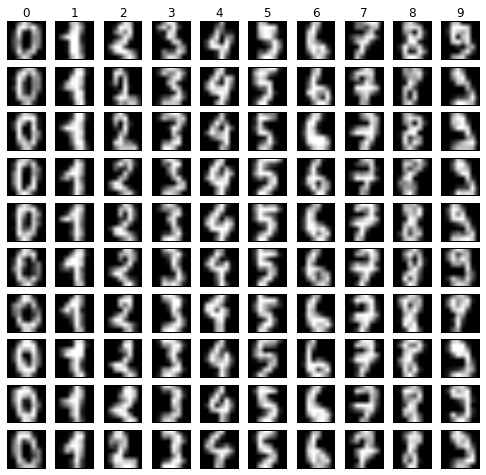

In [1]:
%matplotlib inline

# We have helper code to assist in the loading and plotting of these data
from helper_code import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

In [2]:
# Compute test-train splits

from sklearn.model_selection import train_test_split

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=.25)


# Get sizes
train_dim_one = x_train.shape[0]
train_dim_two = x_train.shape[1]
test_dim_one = x_test.shape[0]

In [3]:
import numpy as np
np.random.seed(23)

num_classes = 10
max_pixel = 16

# Flatten image arrays
x_train = x_train.reshape(train_dim_one, train_dim_two)
x_test = x_test.reshape(test_dim_one, train_dim_two)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize image arrays
x_train /= max_pixel
x_test /= max_pixel

print('{:5d} train samples'.format(x_train.shape[0]))
print('{:5d} test samples'.format(x_test.shape[0]))

# convert class vectors to binary class matrices
from keras.utils import np_utils

y_trainc = np_utils.to_categorical(y_train, num_classes)
y_testc = np_utils.to_categorical(y_test, num_classes)

 1347 train samples
  450 test samples


Using TensorFlow backend.


-----

### Construct Model

Constructing a deep learning model, at this point, is much harder than
constructing a scikit learn model. In large part, this is because we must
define the complete nature of the model. This includes the number and
types of hidden [layers][kl] in the deep learning model, how the layers
will be interconnected, whether or not convolutions will be applied, and
the types of [activation functions][kf] that should be applied to the
outputs of any given layer. To demonstrate this process, we first start
with a simple one layer model that maps our input data into ten classes
and uses a simple activation function.

-----
[kl]: http://keras.io/layers/core/
[kf]: http://keras.io/activations/

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# Build sinlge layer model
model = Sequential()
model.add(Dense(10, input_dim=train_dim_two))
model.add(Activation('softmax'))

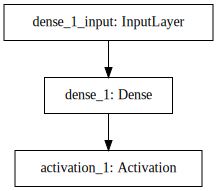

In [5]:
# Display model flowchart
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [6]:
# Display text representation of Keras model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 650.0
Trainable params: 650.0
Non-trainable params: 0.0
_________________________________________________________________


-----

### [Compute Model][km]

Once we have built a suitable model, we compile the model to generate
results more quickly. By default, Keras will use the [Theano][th]
backend, which means our model can be compiled to leverage CPUs or GPUs
(with suitable flags passed to Theano). Another backend option for Keras
is Google's [TensorFlow][tf].

After we have compiled the model, we can fit the model to our training
data. We can also provide validation data to quantify the performance of
the fitting, however, in this case we specify the fraction of training
data to be held out for internal validation via the `validation_split`
parameter. We provide two additional parameters in the model fitting
process: batch size, and number of epochs. The batch size controls how
many data values are fit at any update step, and number of epochs
controls how many steps should be used to revise the weights in hidden
layers.

-----
[km]: http://keras.io/models/sequential/
[th]: http://www.deeplearning.net/software/theano
[tf]: https://www.tensorflow.org

In [7]:
from keras.optimizers import RMSprop

# compile model, using categorical values (i.e., our ten class labels)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [8]:
# Fit model
batch_size = 25
num_epoch = 5
val_spl = 0.2

# Train model, use last part of training data to validate
history = model.fit(x_train, y_trainc,
                    batch_size=batch_size, epochs=num_epoch,
                    verbose=1, validation_split = val_spl)

Train on 1077 samples, validate on 270 samples
Epoch 1/5
1077/1077 [==============================] - 0s - loss: 2.1040 - acc: 0.2776 - val_loss: 1.9927 - val_acc: 0.4111
Epoch 2/5
1077/1077 [==============================] - 0s - loss: 1.9125 - acc: 0.4652 - val_loss: 1.8248 - val_acc: 0.5667
Epoch 3/5
1077/1077 [==============================] - 0s - loss: 1.7520 - acc: 0.6212 - val_loss: 1.6666 - val_acc: 0.6741
Epoch 4/5
1077/1077 [==============================] - 0s - loss: 1.6069 - acc: 0.7038 - val_loss: 1.5280 - val_acc: 0.7222
Epoch 5/5
1077/1077 [==============================] - 0s - loss: 1.4771 - acc: 0.7493 - val_loss: 1.3998 - val_acc: 0.7704


-----

### Results

Our model has internal performance metrics, and also can be applied to
unseen data in order to quantify its robustness. We can obtain score
metrics by calling the `evaluate` method on our model and passing in
unseen test data. We also can obtain class predictions and generate a
confusion matrix, which simplifies the comparison of this simple model
with our previous machine learning classification models for these
data. Even with this simple model, our deep learning approach provides
reasonable results.

-----

In [9]:
# Obtain score results (we set verbose to 0 to hide informational messages)
score = model.evaluate(x_test, y_testc, verbose=0)
print('Test score: {:4.3f}'.format(score[0]))
print('Test accuracy: {:4.3f}'.format(score[1]))

Test score: 1.441
Test accuracy: 0.747


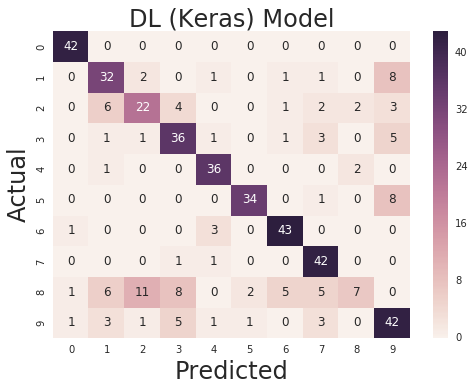

In [10]:
# Obtain test predictions
y_pred = model.predict_classes(x_test, verbose = 0)

# Plot confusion matrix
from helper_code import mlplots as mlp

nms = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
mlp.confusion(y_test, y_pred, nms, 10, 'DL (Keras) Model')

-----

### Complex Network

While our simple model performed adequately, the power of deep learning
is in building more complex models to capture finer details present in
the data. Below we build a more complex model that use three layers
(specified by the [`Dense`][ke] layers). We employ different
activation functions as well as [`Dropout`][kd] steps, which help
prevent overfitting by randomly setting inputs to zero at each update
step. Otherwise, we retain the same code as before (although we do use
more epochs). In the end, the results are better, especially as shown in
the confusion matrix.

-----
[ke]: http://keras.io/layers/core/#dense
[kd]: http://keras.io/layers/core/#dropout

Train on 1077 samples, validate on 270 samples
Epoch 1/10
1077/1077 [==============================] - 0s - loss: 1.8290 - acc: 0.4020 - val_loss: 1.0152 - val_acc: 0.8667
Epoch 2/10
1077/1077 [==============================] - 0s - loss: 0.9738 - acc: 0.7558 - val_loss: 0.4921 - val_acc: 0.9333
Epoch 3/10
1077/1077 [==============================] - 0s - loss: 0.5805 - acc: 0.8737 - val_loss: 0.2929 - val_acc: 0.9556
Epoch 4/10
1077/1077 [==============================] - 0s - loss: 0.4131 - acc: 0.9034 - val_loss: 0.2111 - val_acc: 0.9667
Epoch 5/10
1077/1077 [==============================] - 0s - loss: 0.3461 - acc: 0.9081 - val_loss: 0.1584 - val_acc: 0.9741
Epoch 6/10
1077/1077 [==============================] - 0s - loss: 0.2969 - acc: 0.9183 - val_loss: 0.1370 - val_acc: 0.9741
Epoch 7/10
1077/1077 [==============================] - 0s - loss: 0.2543 - acc: 0.9248 - val_loss: 0.1155 - val_acc: 0.9704
Epoch 8/10
1077/1077 [==============================] - 0s - loss: 0.2477 - ac

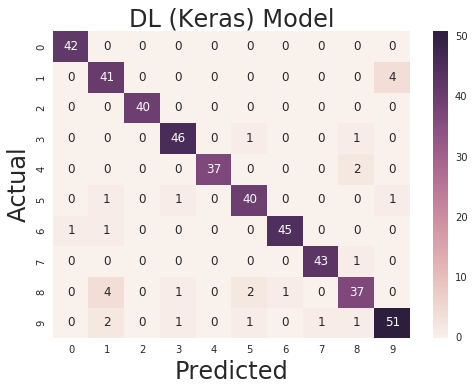

In [11]:
from keras.layers.core import Dropout

model = Sequential()
model.add(Dense(128, input_shape=(train_dim_two,)))
model.add(Activation('tanh'))
model.add(Dropout(0.6))
model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Fit model
batch_size = 25
num_epoch = 10
val_spl = 0.2

history = model.fit(x_train, y_trainc,
                    batch_size=batch_size, epochs=num_epoch,
                    verbose=1, validation_split = val_spl)

print(50*'-')
score = model.evaluate(x_test, y_testc, verbose=0)
print('Test score: {:4.3f}'.format(score[0]))
print('Test accuracy: {:4.3f}'.format(score[1]))

y_pred = model.predict_classes(x_test, verbose = 0)

# Plot confusion matrix
mlp.confusion(y_test, y_pred, nms, 10, 'DL (Keras) Model')

-----

### Blind Testing

We can perform completely blind testing by making our own test data, by
using the previous code we wrote to generate _fake_ ones and sevens. In
the following code cells, we create these fake data and compare the
model predictions to the actual classifications.

-----

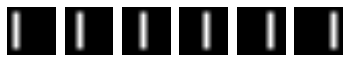

In [12]:
# Test on our ones

ones = hd.make_ones()
hd.plot_numbers(ones)

In [13]:
# Create input label data (all ones)
y_ones = np.empty(ones.shape[0], dtype=np.int8)
y_ones.fill(1)

# Convert to categorical labels
y_onesc = np_utils.to_categorical(y_ones, num_classes)

In [14]:
# Obtain model predictions and convert probability matrix to labels
pred = model.predict(ones, verbose=10)
y_pred = np.argmax(pred, axis=1)

# Display our *confusion matrix*
print(y_ones)
print(y_pred)

[1 1 1 1 1 1]
[4 6 1 1 9 0]


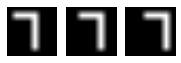

In [15]:
# Now test on our sevens

sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [16]:
# Create input label data (all sevens)
y_sevens = np.empty(sevens.shape[0], dtype=np.int8)
y_sevens.fill(7)

# Convert to categorical labels
y_sevensc = np_utils.to_categorical(y_sevens, num_classes)

In [17]:
# Obtain model predictions and convert probability matrix to labels
pred = model.predict(sevens, verbose=10)
y_pred = np.argmax(pred, axis=1)

# Display our *confusion matrix*
print(y_sevens)
print(y_pred)

[7 7 7]
[3 9 0]


-----
### Student Activity

In the preceding cells, we introduced deep learning by using the Keras
framework. Now that you have run the Notebook, go back and make the
following changes to see how the results change.

1. Change the activation function to `tanh` or `relu` in the simple
model. How do the results change, can you explain why?

2. Change the batch size and number of epochs for the simple model. How
do the results change? Is it how you would naively expect?

3. Modify the complex model by changing the number of output features in
the intermediate layers, the activation functions, or the number of
layers. How do the results change?

More Advanced.

4. Change the network to use a convolution. It might be easier to retain
the two-dimensional nature of the input data and apply a two-dimensional
convolution.

-----